In [3]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv


In [4]:
load_dotenv()

True

In [ ]:
model = ChatOpenAI(model="gpt-4o", temperature=0.9)
resposne= model.invoke("hi")
print(resposne.content)

### Configure the embedding model

In [12]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

len(embeddings.embed_query("hello world"))

1536

### Let's take a data, embed it and store it in vector database.

In [16]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [33]:
dir_loader = DirectoryLoader("../data", glob="**/*.txt", loader_cls=TextLoader)

In [34]:
docs = dir_loader.load()

In [35]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=50)

In [36]:
new_docs = text_splitter.split_documents(docs)

In [37]:
new_docs

[Document(metadata={'source': '../data/usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '../data/usa.txt'}, page_content='The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,'),
 Document(metadata={'source': '../data/usa.txt'}, page_content='It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a'),
 Document(metadata={'source': '../data/usa.txt'}, page_content='a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.'),
 Document(metadata={'source': '../data/usa.txt'}, page_content='innovation, global trade, and financial 

In [38]:
db = Chroma.from_documents(new_docs, embeddings)

In [39]:
retriever = db.as_retriever(search_kwargs={"k": 3})

In [42]:
retriever.invoke("What is the industrial growth of USA?")

[Document(metadata={'source': '../data/usa.txt'}, page_content='The U.S. maintains its GDP growth through strong innovation, entrepreneurship, and investment in R&D. With companies like Apple, Google, Amazon, Microsoft, and Tesla leading global markets, the U.S.'),
 Document(metadata={'source': '../data/usa.txt'}, page_content='a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.'),
 Document(metadata={'source': '../data/usa.txt'}, page_content='Historically, the U.S. economy has enjoyed consistent long-term growth, averaging around 2-3% annually. Post-pandemic, the economy bounced back strongly, but 2022 and 2023 saw rising inflation due to')]

### Creation of Pydantic Model

In [65]:
from pydantic import BaseModel, Field
from typing import  TypedDict, Annotated,Sequence
import operator
from langchain_core.messages import BaseMessage

In [49]:
class TopicSelectionParser(BaseModel):
    Topic: str = Field(..., description="Selected topic for discussion")
    Reasoning: str = Field(..., description="Reasoning behind the topic selection")


In [44]:
from langchain.output_parsers import PydanticOutputParser

In [50]:
pydantic_parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [51]:
pydantic_parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "Selected topic for discussion", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [66]:
class AgentState(TypedDict):
    message: Annotated[Sequence[BaseMessage], operator.add]

In [70]:
def function_1(state: AgentState):
    pass

def function_2(state: AgentState):
    pass

def function_3(state: AgentState):
    pass

In [68]:
def router(state: AgentState) -> str:
    pass

In [71]:
from langgraph.graph import StateGraph, START, END

In [78]:
graph = StateGraph(AgentState)

graph.add_node("Supervisor", function_1)
graph.add_node("RAG", function_2)
graph.add_node("LLM", function_3)

In [79]:
graph.set_entry_point("Supervisor")


In [80]:
graph.add_conditional_edges(
    "Supervisor", 
    router,
    {
        "RAG": "RAG", 
        "LLM": "LLM"
 },
)

In [81]:
graph.add_edge("RAG", END)
graph.add_edge("LLM", END)

In [82]:
workflow = graph.compile()

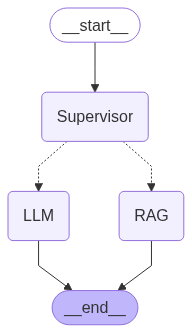

In [83]:
from IPython.display import display, Markdown

display(workflow)